Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import math

Zadanie 10



Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) na odsetek
odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒
2 w przypadku weryfikacji
zgodności z rozkładem 𝑡-Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z
rozkładu 𝑡-Studenta o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta
o 𝑘 st. swobody. Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
rozmiary testów z uwzględnieniem:
- liczby danych,
- liczby klas,
- liczby stopni swobody generowanego rozkładu

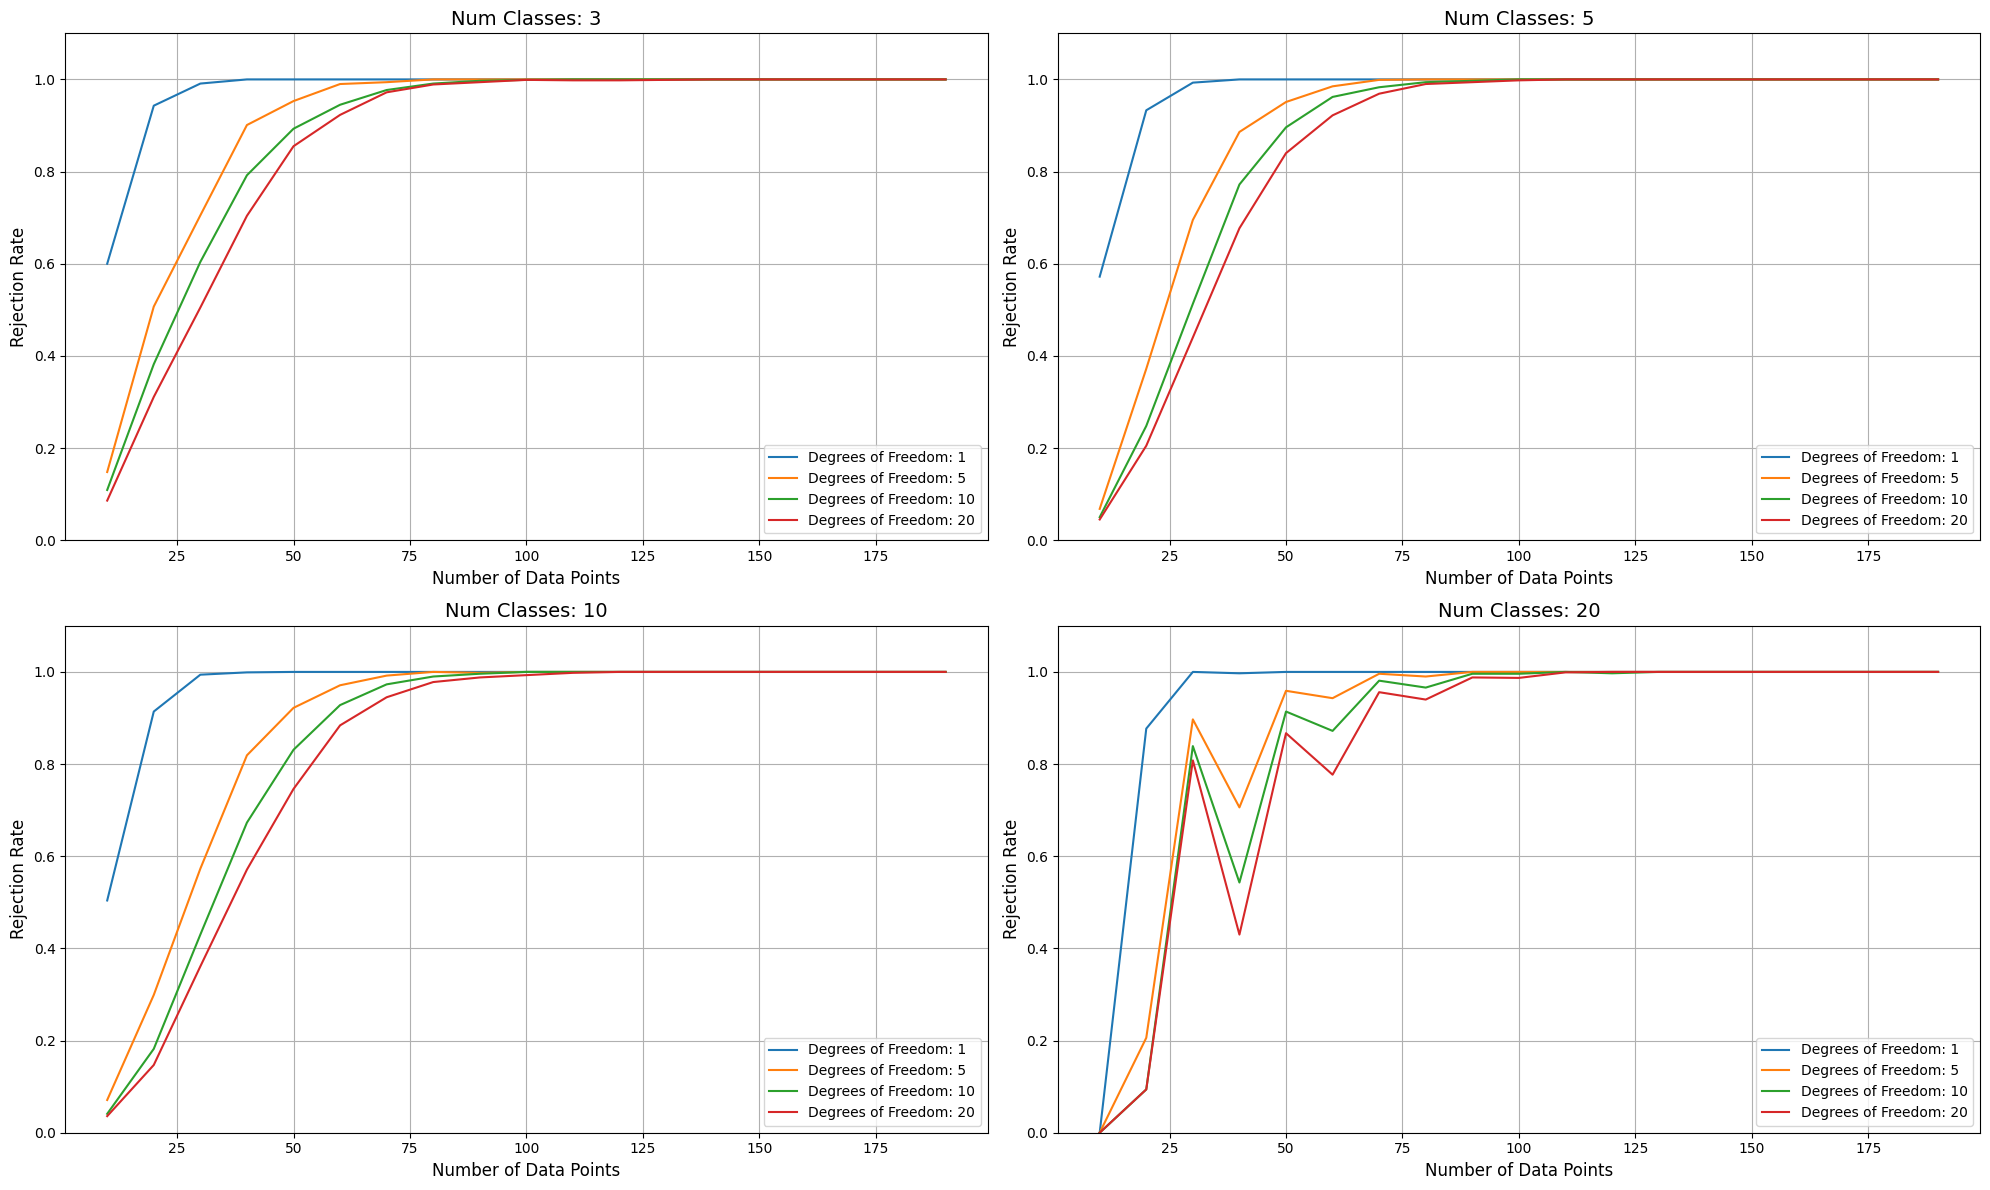

In [4]:
def simulate_chi2_rejections(n, dof, num_classes, num_simulations):
    rejections = np.zeros((len(n), len(dof), len(num_classes)))

    for i, n_val in enumerate(n):
        for j, dof_val in enumerate(dof):
            for k, num_class in enumerate(num_classes):
                for _ in range(num_simulations):
                    data = np.random.standard_t(dof_val, size=n_val)
                    bins = np.linspace(data.min(), data.max(), num_class + 1).tolist()
                    observed, _ = np.histogram(data, bins=bins)
                    expected = np.full_like(observed, len(data) / num_class)
                    if np.any(expected != 0):
                        chi2_statistic = np.sum((observed - expected)**2 / expected)
                        alpha = 0.05
                        critical_value = chi2.ppf(1 - alpha, num_class - 1)

                        if chi2_statistic > critical_value:
                            rejections[i, j, k] += 1

                rejections[i, j, k] /= num_simulations

    return rejections


# Parametry symulacji
n = np.arange(10, 200, 10)  # liczba danych
dof = [1, 5, 10, 20]  # stopnie swobody
num_classes = [3, 5, 10, 20]  # liczba klas
num_simulations = 1000

rejections = simulate_chi2_rejections(n, dof, num_classes, num_simulations)

# Parametry wykresu
num_plots = len(num_classes)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10 * num_cols, 6 * num_rows))

# Wykresy
axs = axs.ravel()

for k, num_classes_val in enumerate(num_classes):
    for j, dof_val in enumerate(dof):
        axs[k].plot(n, rejections[:, j, k], label=f"Degrees of Freedom: {dof_val}")
    axs[k].set_title(f"Num Classes: {num_classes_val}", fontsize=14)
    axs[k].set_xlabel("Number of Data Points", fontsize=12)
    axs[k].set_ylabel("Rejection Rate", fontsize=12)
    axs[k].legend()
    axs[k].grid(True)
    axs[k].set_ylim([0, 1.1]) # Zakres osi Y

# Usunięcie pustych wykresów
for k in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[k])

plt.tight_layout()
plt.show()